In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import glob
from tqdm.notebook import tqdm

In [2]:
%store -r W5kdry_CTRL
%store -r QRAD500dry_CTRL
%store -r dTdry_CTRL
%store -r Gamma_CTRL

%store -r W5kdry_CTRLsw
%store -r QRAD500dry_CTRLsw
%store -r dTdry_CTRLsw
%store -r Gamma_CTRLsw

%store -r W5kdry_EXPT
%store -r QRAD500dry_EXPT
%store -r dTdry_EXPT
%store -r Gamma_EXPT

%store -r W5kdry_EXPTsw
%store -r QRAD500dry_EXPTsw
%store -r dTdry_EXPTsw
%store -r Gamma_EXPTsw

In [3]:
import scipy.io.wavfile
import scipy.signal

b, a = scipy.signal.butter(3, 0.05)

dTdry_CTRL_sm = scipy.signal.filtfilt(b, a, dTdry_CTRL)
W5kdry_CTRL_sm = scipy.signal.filtfilt(b, a, W5kdry_CTRL)
QRAD500dry_CTRL_sm = scipy.signal.filtfilt(b, a, QRAD500dry_CTRL)
eq4LHS_CTRL=-(QRAD500dry_CTRL/86400.0-dTdry_CTRL)/Gamma_CTRL
eq4LHS_CTRL_sm = scipy.signal.filtfilt(b, a, eq4LHS_CTRL)

dTdry_CTRLsw_sm = scipy.signal.filtfilt(b, a, dTdry_CTRLsw)
W5kdry_CTRLsw_sm = scipy.signal.filtfilt(b, a, W5kdry_CTRLsw)
QRAD500dry_CTRLsw_sm = scipy.signal.filtfilt(b, a, QRAD500dry_CTRLsw)
eq4LHS_CTRLsw=-(QRAD500dry_CTRLsw/86400.0-dTdry_CTRLsw)/Gamma_CTRLsw
eq4LHS_CTRLsw_sm = scipy.signal.filtfilt(b, a, eq4LHS_CTRLsw)

dTdry_EXPT_sm = scipy.signal.filtfilt(b, a, dTdry_EXPT)
W5kdry_EXPT_sm = scipy.signal.filtfilt(b, a, W5kdry_EXPT)
QRAD500dry_EXPT_sm = scipy.signal.filtfilt(b, a, QRAD500dry_EXPT)
eq4LHS_EXPT=-(QRAD500dry_EXPT/86400.0-dTdry_EXPT)/Gamma_EXPT
eq4LHS_EXPT_sm = scipy.signal.filtfilt(b, a, eq4LHS_EXPT)

dTdry_EXPTsw_sm = scipy.signal.filtfilt(b, a, dTdry_EXPTsw)
W5kdry_EXPTsw_sm = scipy.signal.filtfilt(b, a, W5kdry_EXPTsw)
QRAD500dry_EXPTsw_sm = scipy.signal.filtfilt(b, a, QRAD500dry_EXPTsw)
eq4LHS_EXPTsw=-(QRAD500dry_EXPTsw/86400.0-dTdry_EXPTsw)/Gamma_EXPTsw
eq4LHS_EXPTsw_sm = scipy.signal.filtfilt(b, a, eq4LHS_EXPTsw)

In [39]:
import matplotlib.pyplot as plt

def plot_subplot(ax, data1, data2, data3, data4, ylabel, title, ylim=None, show_legend=False):
    ax.plot(data1, color='b', label="CTRL", linewidth=1)
    ax.plot(data2, color='r', label="CTRLsw", linewidth=1)
    ax.plot(data3, color='b', label="EXPT", linewidth=5)
    ax.plot(data4, color='r', label="EXPTsw", linewidth=5)
    if ylim is not None:
        ax.set_ylim(ylim)
    else:
        ax.set_ylim(min(min(data1), min(data2), min(data3), min(data4)),
                    max(max(data1), max(data2), max(data3), max(data4)))
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xlabel("Time (Day)", fontsize=15)
    if show_legend:
        ax.legend(fontsize='large')

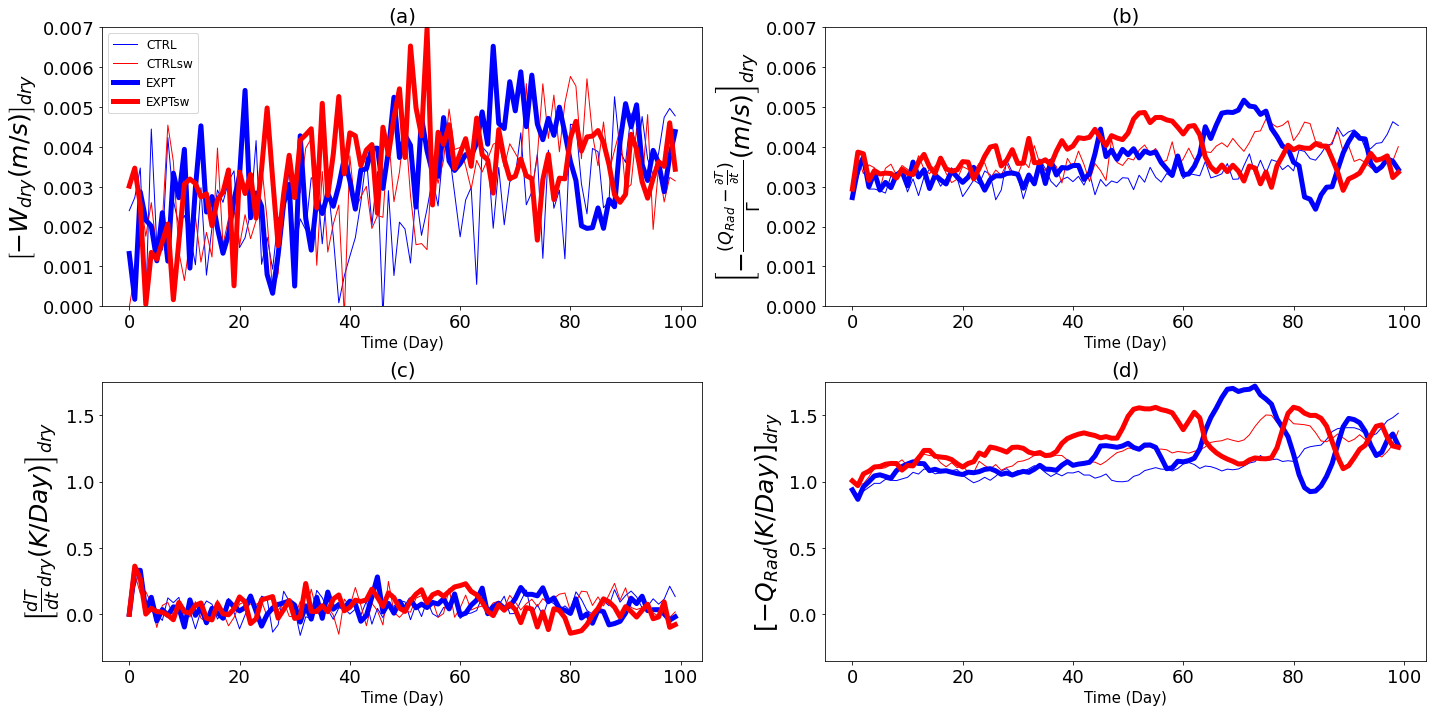

In [40]:
#Plot the raw curves

fig, axl = plt.subplots(2, 2, figsize=(20, 10))

plot_subplot(axl[0, 0], -W5kdry_CTRL, -W5kdry_CTRLsw, -W5kdry_EXPT, -W5kdry_EXPTsw,
             "$\\left[-W_{dry} (m/s)\\right]_{dry}$", "(a)", ylim=(0.00, 0.007), show_legend=True)

plot_subplot(axl[0, 1], eq4LHS_CTRL, eq4LHS_CTRLsw, eq4LHS_EXPT, eq4LHS_EXPTsw,
             "$\\left[{-\\frac{(Q_{Rad}-\\frac{\partial T}{\partial t})}{\Gamma}} (m/s) \\right]_{dry}$", "(b)", ylim=(0.00, 0.007))

plot_subplot(axl[1, 0], dTdry_CTRL*86400.0, dTdry_CTRLsw*86400.0, dTdry_EXPT*86400.0, dTdry_EXPTsw*86400.0,
             "$\\left[\\frac{dT}{dt}_{dry} (K/Day)\\right]_{dry}$", "(c)", ylim=(-0.35, 1.75))

plot_subplot(axl[1, 1], -QRAD500dry_CTRL, -QRAD500dry_CTRLsw, -QRAD500dry_EXPT, -QRAD500dry_EXPTsw,
             "$\\left[-Q_{Rad}(K/Day)\\right]_{dry}$", "(d)", ylim=(-0.35, 1.75))

plt.tight_layout()
#Saving figure
fig_directory='/fs3/home/bgoswami/work/20220913_SAM/SAM_Manuscript_01/Final_Figs'
figname="Figure_Supp_for_6"

plt.savefig(''+str(fig_directory)+'/'+str(figname)+'.svg', format="svg",transparent=True, dpi=1200)
!rsvg-convert -f pdf -o {fig_directory}/{figname}.pdf {fig_directory}/{figname}.svg
plt.show()

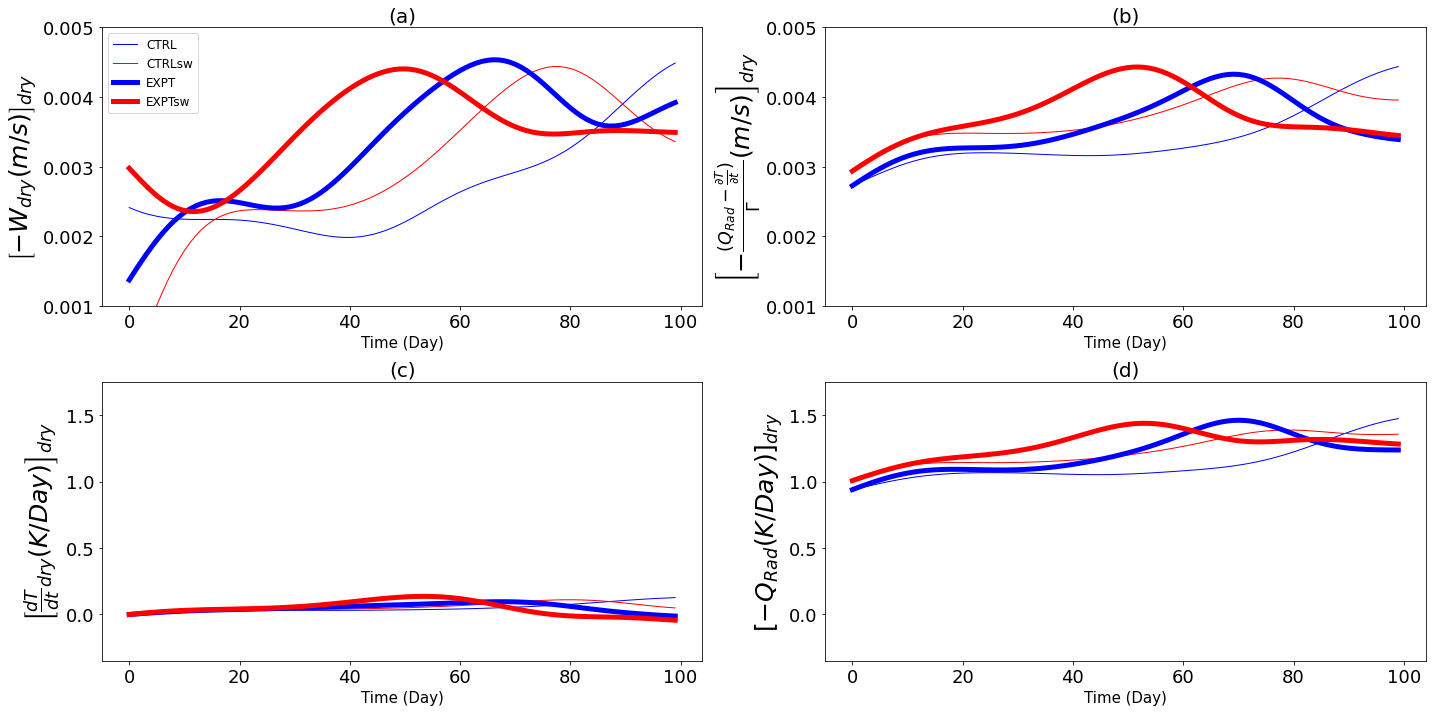

In [41]:
#Plot the smoothed curves

fig, axl = plt.subplots(2, 2, figsize=(20, 10))

plot_subplot(axl[0, 0], -W5kdry_CTRL_sm, -W5kdry_CTRLsw_sm, -W5kdry_EXPT_sm, -W5kdry_EXPTsw_sm,
             "$\\left[-W_{dry} (m/s)\\right]_{dry}$", "(a)", ylim=(0.001, 0.005), show_legend=True)

plot_subplot(axl[0, 1], eq4LHS_CTRL_sm, eq4LHS_CTRLsw_sm, eq4LHS_EXPT_sm, eq4LHS_EXPTsw_sm,
             "$\\left[{-\\frac{(Q_{Rad}-\\frac{\partial T}{\partial t})}{\Gamma}} (m/s) \\right]_{dry}$", "(b)", ylim=(0.001, 0.005))

plot_subplot(axl[1, 0], dTdry_CTRL_sm*86400.0, dTdry_CTRLsw_sm*86400.0, dTdry_EXPT_sm*86400.0, dTdry_EXPTsw_sm*86400.0,
             "$\\left[\\frac{dT}{dt}_{dry} (K/Day)\\right]_{dry}$", "(c)", ylim=(-0.35, 1.75))

plot_subplot(axl[1, 1], -QRAD500dry_CTRL_sm, -QRAD500dry_CTRLsw_sm, -QRAD500dry_EXPT_sm, -QRAD500dry_EXPTsw_sm,
             "$\\left[-Q_{Rad}(K/Day)\\right]_{dry}$", "(d)", ylim=(-0.35, 1.75))

plt.tight_layout()

#Saving figure
fig_directory='/fs3/home/bgoswami/work/20220913_SAM/SAM_Manuscript_01/Final_Figs'
figname="Figure_6"

plt.savefig(''+str(fig_directory)+'/'+str(figname)+'.svg', format="svg",transparent=True, dpi=1200)
!rsvg-convert -f pdf -o {fig_directory}/{figname}.pdf {fig_directory}/{figname}.svg
plt.show()
